# TO PREDICT THE CHOICE OF THE VEHICLE USING MACHINE LEARNING MODEL

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
train = pd.read_csv('dataset/train.csv')

In [194]:
train.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [165]:
test = pd.read_csv('dataset/test.csv')

In [166]:
test.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.0,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.0,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,NaN,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.0,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.0,6500.0,Service,Yes,Yes,Hybrid


In [8]:
train.shape

(30000, 13)

In [9]:
test.shape

(5000, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              5000 non-null   object 
 1   Age                     4933 non-null   float64
 2   Gender                  4919 non-null   object 
 3   City                    4928 non-null   object 
 4   is_Married              4915 non-null   object 
 5   family_size             4927 non-null   float64
 6   height                  4933 non-null   float64
 7   annual_income           4922 non-null   float64
 8   job                     4926 non-null   object 
 9   is_physically_ok        4934 non-null   object 
 10  has_taken_car_loan      4939 non-null   object 
 11  preferable_fuel_choice  4917 non-null   object 
dtypes: float64(4), object(8)
memory usage: 468.9+ KB


# Visualization

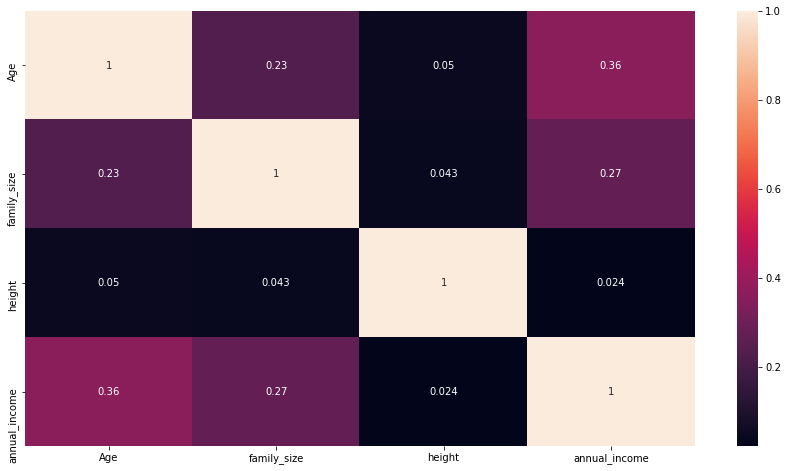

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

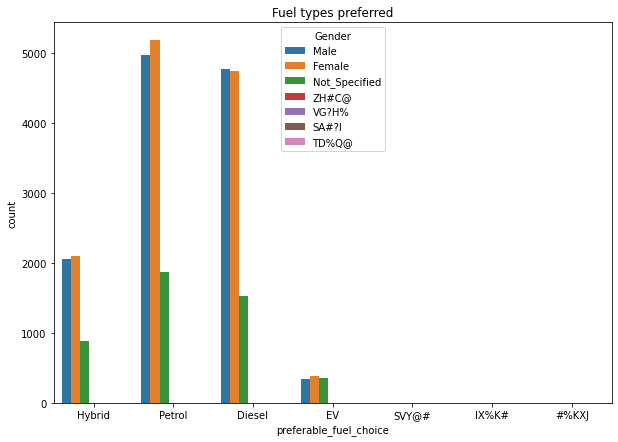

In [13]:
plt.subplots(figsize=(10,7))
plt.title('Fuel types preferred')
sns.countplot(x='preferable_fuel_choice', data=train, hue='Gender')
plt.show()

More people are using petrol and diesel cars than hybrid cars

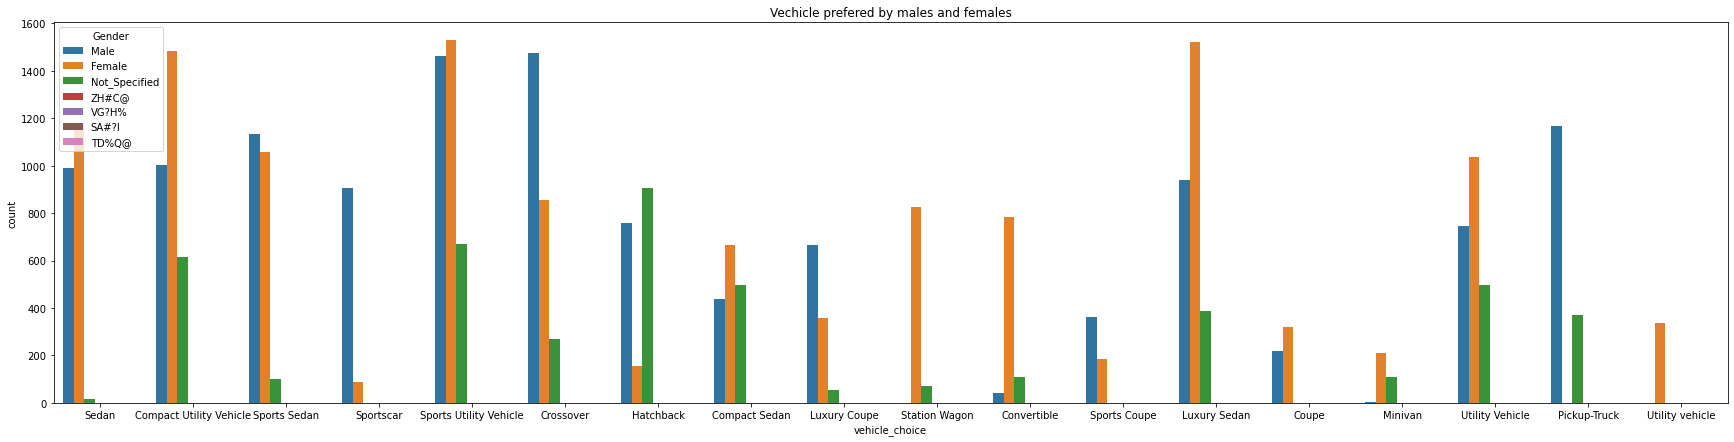

In [14]:
plt.subplots(figsize=(30,7))
plt.title('Vechicle prefered by males and females')
sns.countplot(x='vehicle_choice', data=train, hue='Gender')
plt.show()

Males mostly buy Crossover but females prefer luxuary Sedan . Both males and female equally prefer Sports Utility vechicle

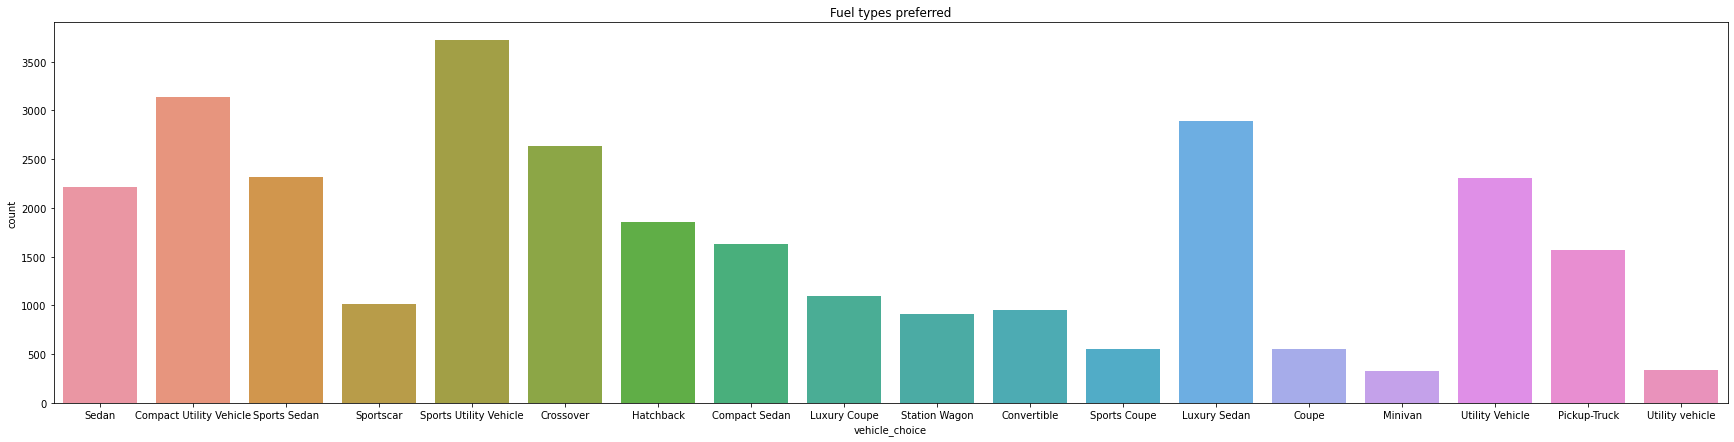

In [16]:
plt.subplots(figsize=(30,7))
plt.title('Fuel types preferred')
sns.countplot(x='vehicle_choice', data=train)
plt.show()

In [17]:
Most prefered vehicle is Sports Utility vechicle and less prefered is Minivan

SyntaxError: invalid syntax (<ipython-input-17-cda26009e835>, line 1)

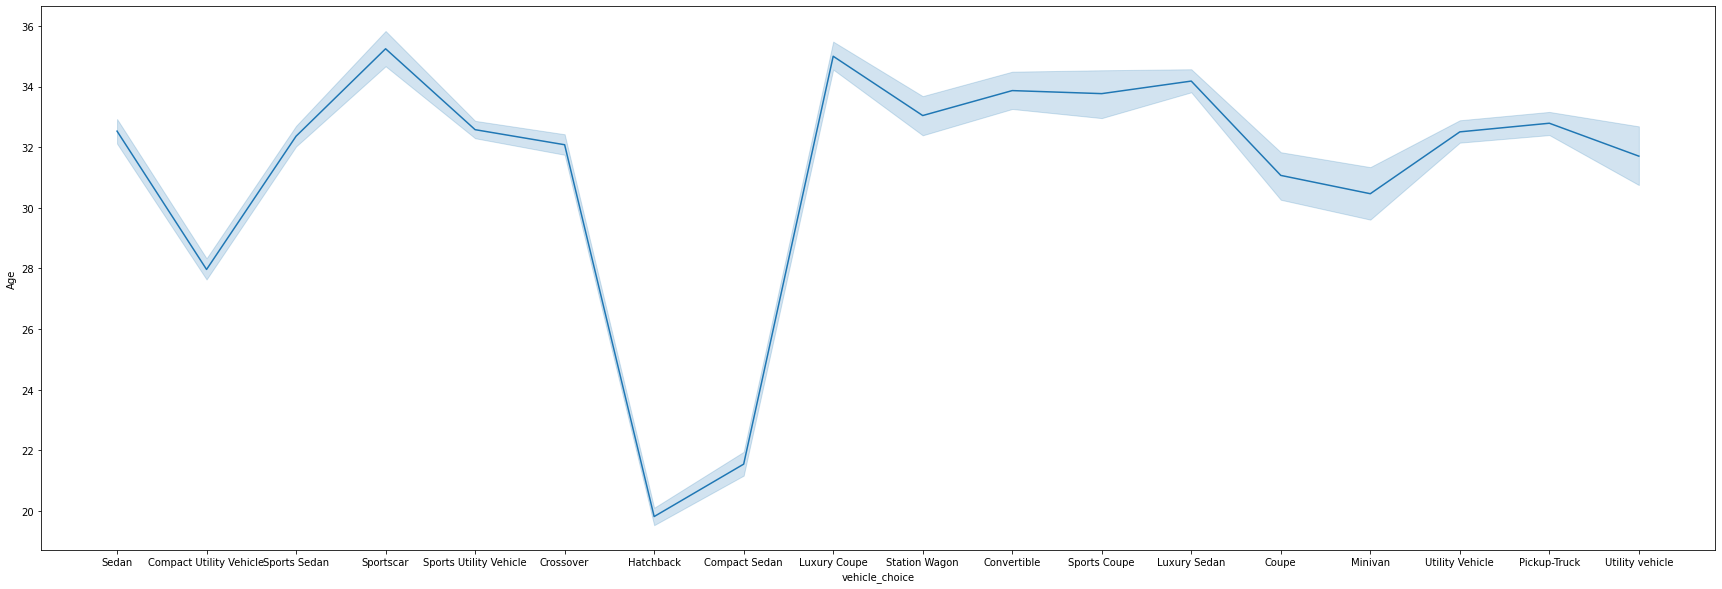

In [18]:
plt.subplots(figsize=(30,10))
sns.lineplot(x='vehicle_choice',y='Age',data=train)
plt.show()

# PREPROCESSING

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


In [20]:
train.describe()

,Age,family_size,height,annual_income
count,29561.000000,29586.000000,29569.000000,29581.000000
mean,30.998545,2.876225,153.023741,84678.162672
std,9.904351,1.633711,11.175516,60802.123202
min,15.000000,1.000000,130.000000,2000.000000
25%,24.000000,1.000000,144.000000,36820.000000
50%,30.000000,3.000000,152.000000,82070.000000
75%,36.000000,4.000000,160.000000,128210.000000
max,60.000000,6.000000,180.000000,499000.000000


In [21]:
train.isna().sum()

CustomerID                  0
Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

There are some missing values in the data. We are using KNNImputer to fill the missing values.

In [22]:
num=[col for col in train.columns if train[col].dtype =='float64']

In [23]:
num

['Age', 'family_size', 'height', 'annual_income']

In [24]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=6)

In [25]:
knn.fit(train[num])

KNNImputer(n_neighbors=6)

In [26]:
train1=pd.DataFrame(knn.transform(train[num]))

In [27]:
train1.head()

,0,1,2,3
0,36.0,2.0,160.0,32200.0
1,15.0,1.0,143.0,9000.0
2,55.0,2.0,168.0,152400.0
3,23.0,3.0,165.0,141140.0
4,23.0,1.0,147.0,38100.0


In [28]:
train1.columns=['Age', 'family_size', 'height', 'annual_income']

In [29]:
Series={'CustomerID':train['CustomerID'],'Age':train1['Age'],'Gender':train['Gender'].values,'City':train['City'].values,'is_Married':train['is_Married'].values,'family_size':train1['family_size'].values,'height':train1['height'].values,'annual_income':train1['annual_income'].values,'job':train['job'].values,'is_physically_ok':train['is_physically_ok'].values,'has_taken_car_loan':train['has_taken_car_loan'].values,'preferable_fuel_choice':train['preferable_fuel_choice'].values,'vehicle_choice':train['vehicle_choice'].values}
train=pd.DataFrame(Series)
train.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [30]:
train.isna().sum()

CustomerID                  0
Age                         0
Gender                    417
City                      423
is_Married                420
family_size                 0
height                      0
annual_income               0
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

Now the remaining missing values we are going to fill using mode since they are object datatypes

In [49]:
train['Gender'].value_counts()

Female           12588
Male             12316
Not_Specified     4675
SA#?I                1
ZH#C@                1
TD%Q@                1
VG?H%                1
Name: Gender, dtype: int64

In [50]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['City']=train['City'].fillna(train['City'].mode()[0])
train['is_Married']=train['is_Married'].fillna(train['is_Married'].mode()[0])
train['job']=train['job'].fillna(train['job'].mode()[0])
train['is_physically_ok']=train['is_physically_ok'].fillna(train['is_physically_ok'].mode()[0])
train['has_taken_car_loan']=train['has_taken_car_loan'].fillna(train['has_taken_car_loan'].mode()[0])
train['preferable_fuel_choice']=train['preferable_fuel_choice'].fillna(train['preferable_fuel_choice'].mode()[0])

In [51]:
train.isna().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
vehicle_choice            0
dtype: int64

Now all missing values are filled

# Splitting into Feature columns and Target column

In [55]:
X = train.drop(['vehicle_choice','CustomerID'],axis=1)
X.head()

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid
1,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol
2,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol
3,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel
4,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid


In [54]:
y=train['vehicle_choice']
y.head()

0                      Sedan
1    Compact Utility Vehicle
2               Sports Sedan
3                  Sportscar
4     Sports Utility Vehicle
Name: vehicle_choice, dtype: object

# Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
h=['Gender','job', 'is_physically_ok', 'has_taken_car_loan','preferable_fuel_choice','is_Married']
for i in np.arange(len(h)):
    X[h[i]] = label_en.fit_transform(X[h[i]])  

In [60]:
X.head()

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,36.0,1,New York City,2,2.0,160.0,32200.0,2,3,4,3
1,15.0,0,New York City,6,1.0,143.0,9000.0,2,3,4,5
2,55.0,1,Paris,3,2.0,168.0,152400.0,2,3,3,5
3,23.0,1,Vancouver,2,3.0,165.0,141140.0,0,3,3,1
4,23.0,2,Vancouver,6,1.0,147.0,38100.0,2,3,4,3


In [61]:
X=pd.get_dummies(X)
X.head()

,Age,Gender,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,...,City_P?IX@,City_Paris,City_Perth,City_San Francisco,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna
0,36.0,1,2,2.0,160.0,32200.0,2,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,15.0,0,6,1.0,143.0,9000.0,2,3,4,5,...,0,0,0,0,0,0,0,0,0,0
2,55.0,1,3,2.0,168.0,152400.0,2,3,3,5,...,0,1,0,0,0,0,0,0,0,0
3,23.0,1,2,3.0,165.0,141140.0,0,3,3,1,...,0,0,0,0,0,0,0,0,1,0
4,23.0,2,6,1.0,147.0,38100.0,2,3,4,3,...,0,0,0,0,0,0,0,0,1,0


In [63]:
X.describe()

,Age,Gender,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,...,City_P?IX@,City_Paris,City_Perth,City_San Francisco,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,30.989167,0.722800,3.600133,2.875378,153.018006,84620.166722,1.194500,2.871800,3.470533,3.058267,...,0.000033,0.044033,0.043600,0.046533,0.043300,0.043867,0.045000,0.044133,0.043567,0.044867
std,9.852399,0.717155,1.565946,1.625506,11.107624,60538.272761,1.304119,0.606666,0.499807,1.790674,...,0.005774,0.205173,0.204207,0.210641,0.203535,0.204802,0.207308,0.205395,0.204132,0.207015
min,15.000000,0.000000,0.000000,1.000000,130.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,1.000000,144.000000,37000.000000,0.000000,3.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,152.000000,82295.000000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,6.000000,4.000000,160.000000,127700.000000,2.000000,3.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,6.000000,7.000000,6.000000,180.000000,499000.000000,7.000000,3.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Label Encoding of Target Column

In [64]:
#LabelEncoding of column vehicle_choice
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)

In [65]:
y

array([10,  1, 12, ...,  7, 13,  7])

# Feature Scaling

In [66]:
X.dtypes

Age                       float64
Gender                      int64
is_Married                  int32
family_size               float64
height                    float64
annual_income             float64
job                         int64
is_physically_ok            int64
has_taken_car_loan          int64
preferable_fuel_choice      int64
City_#B?TL                  uint8
City_#VPI@                  uint8
City_#XY@G                  uint8
City_Barcelona              uint8
City_Berlin                 uint8
City_Budapest               uint8
City_Chennai                uint8
City_Delhi                  uint8
City_Florence               uint8
City_Kolkata                uint8
City_Kuala Lampur           uint8
City_London                 uint8
City_Los Angeles            uint8
City_Mumbai                 uint8
City_Munich                 uint8
City_New York City          uint8
City_P?IX@                  uint8
City_Paris                  uint8
City_Perth                  uint8
City_San Franc

In [67]:
f=[col for col in X.columns if X[col].dtype =='float64']

In [68]:
f

['Age', 'family_size', 'height', 'annual_income']

In [69]:
from sklearn import preprocessing 
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X[f] = min_max.fit_transform(X[f])

In [70]:
x1=X.drop(f,axis=1)

In [71]:
X=pd.concat([x1,X[f]],axis=1)

In [72]:
X.head()

,Gender,is_Married,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,City_#B?TL,City_#VPI@,City_#XY@G,City_Barcelona,...,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna,Age,family_size,height,annual_income
0,1,2,2,3,4,3,0,0,0,0,...,0,0,0,0,0,0,0.466667,0.2,0.60,0.060765
1,0,6,2,3,4,5,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.0,0.26,0.014085
2,1,3,2,3,3,5,0,0,0,0,...,0,0,0,0,0,0,0.888889,0.2,0.76,0.302616
3,1,2,0,3,3,1,0,0,0,0,...,0,0,0,0,1,0,0.177778,0.4,0.70,0.279960
4,2,6,2,3,4,3,0,0,0,0,...,0,0,0,0,1,0,0.177778,0.0,0.34,0.072636


In [73]:
X.describe()

,Gender,is_Married,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,City_#B?TL,City_#VPI@,City_#XY@G,City_Barcelona,...,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna,Age,family_size,height,annual_income
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.722800,3.600133,1.194500,2.871800,3.470533,3.058267,0.000033,0.000033,0.000033,0.062633,...,0.043300,0.043867,0.045000,0.044133,0.043567,0.044867,0.355315,0.375076,0.460360,0.166238
std,0.717155,1.565946,1.304119,0.606666,0.499807,1.790674,0.005774,0.005774,0.005774,0.242306,...,0.203535,0.204802,0.207308,0.205395,0.204132,0.207015,0.218942,0.325101,0.222152,0.121807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.280000,0.070423
50%,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.400000,0.440000,0.161559
75%,1.000000,6.000000,2.000000,3.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466667,0.600000,0.600000,0.252918
max,6.000000,7.000000,7.000000,3.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling
# Splitting dataset into training and test sets

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0 ) 

In [75]:
X_train.shape

(22500, 36)

In [76]:
X_test.shape

(7500, 36)

In [77]:
y_train.shape

(22500,)

In [78]:
y_test.shape

(7500,)

# Supervised Machine Learning Models
# Logistic Regression

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
#To fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [81]:
#To predict
y_pred1 = lr.predict(X_test)
print('Predicted values are: ',y_pred1)

Predicted values are:  [13 12 11 ... 10  1  0]


In [82]:
#To check the accuracy, precision score, confusion matrix, recall score, f1 score
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score, f1_score

In [83]:
#Confusion Matrix
conf1=confusion_matrix(y_test,y_pred1)

In [85]:
conf1

array([[148, 104,   4,   0,  10, 114,   1,   0,   0,   1,  12,   0,   0,
          1,   0,   0,   6,   0],
       [ 50, 327,   2,  11,  38, 144,   2,   6,   8,  21,  75,   0,  37,
         26,   2,   0,  55,   0],
       [  0,   0,  69,   1,   1,   2,  55,  29,   0,   0,   0,  17,   0,
         29,  15,   0,   0,   0],
       [  9,  31,   0,  29,   3,  17,   1,   1,   0,   0,  28,   2,   0,
          4,   4,   0,   8,   0],
       [ 11,  99,   8,   0, 123,  30,   0,  58,   1,  18, 116,  10,  13,
         94,  21,   0,  42,   3],
       [ 31,  64,   1,   0,   3, 327,   3,   0,   0,   3,  20,   0,   0,
          6,   0,   0,   0,   0],
       [  0,   2,  25,   1,   1,   0, 174,  26,   0,   3,   0,   0,   5,
          3,   3,   0,   2,   0],
       [  1,  11,  26,   1,   8,   0,  21, 399,   0,  21,  14,   9,  47,
        120,  14,  17,   8,   0],
       [  9,  29,   0,   0,   0,   0,   0,   0,   0,   8,   3,   0,   0,
         21,   0,   0,   2,   0],
       [  3,  64,   0,   1,  25,   2,

In [86]:
a1=round(accuracy_score(y_test,y_pred1),3)
p1=round(precision_score(y_test, y_pred1,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred1,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred1,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.363
1,Precision Score,0.363
2,Recall Score,0.363
3,F1 Score,0.363


# KNN Classifier

In [87]:
#To check for which k value we have highest accuracy
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
  Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  Classifier.fit(X_train,y_train)
  y_pred2=Classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred2)
  acc_values.append(acc)

Text(0, 0.5, 'accuracy')

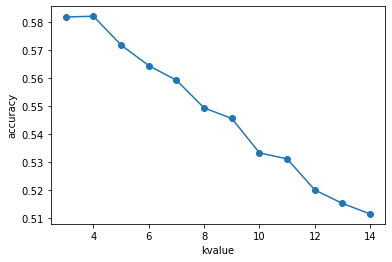

In [88]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [89]:
#To fit the model
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [90]:
#To predict
y_pred2 = knn.predict(X_test)
print('Predicted values are: ',y_pred2)

Predicted values are:  [ 4  1  7 ... 16 10  0]


In [99]:
#Confusion Matrix
conf2=confusion_matrix(y_test,y_pred2)
conf2

array([[297,  30,   0,   0,  11,  32,   0,   0,   1,   2,   9,   0,   1,
          2,   0,   3,  13,   0],
       [ 40, 578,   1,   8,  28,  31,   0,  22,   9,   9,  30,   1,  23,
         12,   1,   1,  10,   0],
       [  3,   6, 137,   2,   1,   0,  29,  26,   0,   0,   2,   0,   1,
          9,   2,   0,   0,   0],
       [  1,   3,   7,  77,   1,  16,   0,   1,   0,   0,  16,   0,   0,
          3,   0,   0,  12,   0],
       [ 16,  55,   1,   1, 385,  11,   0,  60,   2,   4,  10,   0,  20,
         42,   9,   2,  25,   4],
       [ 61,  64,   1,  11,  20, 284,   2,   1,   1,   5,   2,   0,   0,
          2,   0,   1,   1,   2],
       [  2,   0,  43,   0,   0,   2, 154,  32,   0,   0,   0,   0,   0,
         11,   1,   0,   0,   0],
       [ 10,  17,  45,   1,  60,   0,  30, 450,   2,   0,   7,   4,  11,
         45,   7,  11,  12,   5],
       [  9,  26,   0,   0,   5,   0,   0,   9,  16,   2,   1,   0,   2,
          1,   0,   0,   1,   0],
       [  1,  17,   2,   0,   1,   0,

In [118]:
a1=round(accuracy_score(y_test,y_pred2),3)
p1=round(precision_score(y_test, y_pred2,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred2,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred2,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.582
1,Precision Score,0.582
2,Recall Score,0.582
3,F1 Score,0.582


# Support Vector Machine

In [93]:
# To fit the model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
#To predict
y_pred3 = svc.predict(X_test)
print('Predicted values are: ',y_pred3)

Predicted values are:  [13 10  7 ...  7 12  0]


In [98]:
#Confusion Matrix
conf3=confusion_matrix(y_test,y_pred3)
conf3

array([[110, 155,   0,   0,  22, 103,   0,   0,   0,   4,   3,   0,   0,
          0,   0,   1,   3,   0],
       [  9, 366,   3,   2,  72, 137,   0,  24,   3,  15,  36,   0,  42,
         19,   0,   0,  76,   0],
       [  0,   0, 163,   0,   4,   0,  48,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1],
       [ 18,  38,   9,  58,   1,   2,   0,   0,   0,   0,  11,   0,   0,
          0,   0,   0,   0,   0],
       [ 15, 118,   5,   9, 160,   8,   0,  79,   0,   8,  80,   0,  17,
         71,  12,   0,  42,  23],
       [ 44,  90,   0,   0,   9, 296,   0,   0,   0,   6,   5,   0,   0,
          0,   2,   2,   4,   0],
       [  0,   0,  49,   0,   1,   0, 181,  14,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   5,  66,   1,  12,   1,  35, 485,   0,   5,   0,   0,   0,
         97,   1,   2,   7,   0],
       [ 10,  35,   0,   1,   1,   0,   0,   0,   0,   2,   1,   0,   0,
         22,   0,   0,   0,   0],
       [  9,  44,   0,   1,  28,   1,

In [119]:
a1=round(accuracy_score(y_test,y_pred3),3)
p1=round(precision_score(y_test, y_pred3,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred3,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred3,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.433
1,Precision Score,0.433
2,Recall Score,0.433
3,F1 Score,0.433


# Decision Tree Classifier

In [100]:
#To fit the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
#To predict
y_pred4 = dt.predict(X_test)
print('Predicted values are: ',y_pred4)


Predicted values are:  [ 4  1  4 ... 16  1  0]


In [102]:
#Confusion Matrix
conf4=confusion_matrix(y_test,y_pred4)

In [120]:
a1=round(accuracy_score(y_test,y_pred4),3)
p1=round(precision_score(y_test, y_pred4,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred4,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred4,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.917
1,Precision Score,0.917
2,Recall Score,0.917
3,F1 Score,0.917


# Random Forest Classifier

In [104]:
#To fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
#To predict
y_pred5 = rf.predict(X_test)
print('Predicted values are: ',y_pred5)

Predicted values are:  [ 4  1  4 ... 16  1  0]


In [106]:
#Confusion Matrix
conf5=confusion_matrix(y_test,y_pred5)

In [121]:
a1=round(accuracy_score(y_test,y_pred5),3)
p1=round(precision_score(y_test, y_pred5,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred5,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred5,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.943
1,Precision Score,0.943
2,Recall Score,0.943
3,F1 Score,0.943


# Gradient Boosting

In [108]:
#To fit the model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [109]:
#To predict
y_pred6 = gb.predict(X_test)
print('Predicted values are: ',y_pred6)

Predicted values are:  [ 4  1  4 ... 16  1  0]


In [110]:
#Confusion Matrix
conf6=confusion_matrix(y_test,y_pred6)
conf6

array([[364,  24,   0,   0,   6,   1,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   1,   4,   0],
       [  6, 713,   1,   0,  46,   3,   0,   0,   4,   2,  11,   0,   9,
          4,   0,   0,   5,   0],
       [  0,   0, 204,   0,   0,   0,  10,   3,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0],
       [  0,   0,   2, 128,   0,   2,   0,   0,   0,   0,   5,   0,   0,
          0,   0,   0,   0,   0],
       [  1,  38,   0,   1, 530,   2,   0,   7,   0,   5,  18,   0,   1,
          1,   0,   3,  13,  27],
       [ 10,   8,   0,   0,   0, 437,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   1,   1],
       [  0,   0,  12,   0,   0,   0, 230,   1,   0,   0,   0,   0,   0,
          0,   1,   0,   1,   0],
       [  0,   0,   1,   0,   7,   0,   0, 665,   2,   5,   1,   2,   5,
         20,   1,   4,   4,   0],
       [  1,   6,   0,   0,   2,   2,   0,   0,  59,   0,   0,   0,   1,
          0,   0,   0,   1,   0],
       [  5,   4,   0,   0,   3,   0,

In [122]:
a1=round(accuracy_score(y_test,y_pred6),3)
p1=round(precision_score(y_test, y_pred6,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred6,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred6,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.886
1,Precision Score,0.886
2,Recall Score,0.886
3,F1 Score,0.886


# Naive Bayes Classifier

In [114]:
#To fit the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [115]:
#To predict
y_pred8 = gnb.predict(X_test)
print('Predicted values are: ',y_pred8)

Predicted values are:  [12 12 11 ...  3 12  3]


In [116]:
#Confusion Matrix
conf8=confusion_matrix(y_test,y_pred8)

In [123]:
a1=round(accuracy_score(y_test,y_pred8),3)
p1=round(precision_score(y_test, y_pred8,pos_label='positive',average='micro'),3)
r1=round(recall_score(y_test, y_pred8,pos_label='positive',average='micro'),3)
f1=round(f1_score(y_test, y_pred8,pos_label='positive',average='micro'),3)
d1={"Metric":['Acccuracy Score','Precision Score','Recall Score','F1 Score'],"Value":[a1,p1,r1,f1]}
pd.DataFrame(d1)

,Metric,Value
0,Acccuracy Score,0.164
1,Precision Score,0.164
2,Recall Score,0.164
3,F1 Score,0.164


Here Random Forest gives the best accuracy 94.3%

# Fine Tuning of Hyperparameters

# Random Forest Classifier

In [128]:
rf=RandomForestClassifier(bootstrap='gini', max_features=20,n_estimators=1200)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap='gini', max_features=20, n_estimators=1200)

In [129]:
accuracy_score(y_test,rf.predict(X_test))

0.9457333333333333

In [130]:
f1_score(y_test,rf.predict(X_test),average='micro')

0.9457333333333333

Accuracy increased from 94.3% to 98.5%.

# Preprocessing on test data

In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              5000 non-null   object 
 1   Age                     4933 non-null   float64
 2   Gender                  4919 non-null   object 
 3   City                    4928 non-null   object 
 4   is_Married              4915 non-null   object 
 5   family_size             4927 non-null   float64
 6   height                  4933 non-null   float64
 7   annual_income           4922 non-null   float64
 8   job                     4926 non-null   object 
 9   is_physically_ok        4934 non-null   object 
 10  has_taken_car_loan      4939 non-null   object 
 11  preferable_fuel_choice  4917 non-null   object 
dtypes: float64(4), object(8)
memory usage: 468.9+ KB


In [168]:
test.describe()

,Age,family_size,height,annual_income
count,4933.000000,4927.000000,4933.000000,4922.000000
mean,31.036286,2.837426,152.942631,83881.316538
std,9.913909,1.637387,11.265368,60359.972475
min,15.000000,1.000000,130.000000,2000.000000
25%,24.000000,1.000000,144.000000,35165.000000
50%,30.000000,3.000000,152.000000,81480.000000
75%,36.000000,4.000000,160.000000,127272.500000
max,60.000000,6.000000,180.000000,499900.000000


In [169]:
test.isna().sum()

CustomerID                 0
Age                       67
Gender                    81
City                      72
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          66
has_taken_car_loan        61
preferable_fuel_choice    83
dtype: int64

In [170]:
num=[col for col in train.columns if train[col].dtype =='float64']

In [171]:
num

['Age', 'family_size', 'height', 'annual_income']

In [172]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=6)
knn.fit(test[num])
test1=pd.DataFrame(knn.transform(test[num]))

In [173]:
test1

,0,1,2,3
0,32.0,6.0,142.000000,150800.0
1,22.0,4.0,155.000000,167000.0
2,46.0,2.0,151.166667,66000.0
3,35.0,1.0,137.000000,71820.0
4,48.0,3.0,162.000000,6500.0
...,...,...,...,...
4995,31.0,5.0,145.000000,87305.0
4996,39.0,2.0,169.000000,52870.0
4997,28.0,4.0,155.000000,151500.0
4998,37.0,5.0,153.000000,110470.0


In [174]:
test1.columns=['Age', 'family_size', 'height', 'annual_income']

In [175]:
Series={'CustomerID':test['CustomerID'],'Age':test1['Age'],'Gender':test['Gender'].values,'City':test['City'].values,'is_Married':test['is_Married'].values,'family_size':test1['family_size'].values,'height':test1['height'].values,'annual_income':test1['annual_income'].values,'job':test['job'].values,'is_physically_ok':test['is_physically_ok'].values,'has_taken_car_loan':test['has_taken_car_loan'].values,'preferable_fuel_choice':test['preferable_fuel_choice'].values}
test=pd.DataFrame(Series)
test.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.000000,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.000000,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,151.166667,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.000000,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.000000,6500.0,Service,Yes,Yes,Hybrid


In [176]:
test.isna().sum()

CustomerID                 0
Age                        0
Gender                    81
City                      72
is_Married                85
family_size                0
height                     0
annual_income              0
job                       74
is_physically_ok          66
has_taken_car_loan        61
preferable_fuel_choice    83
dtype: int64

Now the remaining missing values we are going to fill using mode since they are object datatypes

In [177]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['City']=test['City'].fillna(test['City'].mode()[0])
test['is_Married']=test['is_Married'].fillna(test['is_Married'].mode()[0])
test['job']=test['job'].fillna(test['job'].mode()[0])
test['is_physically_ok']=test['is_physically_ok'].fillna(test['is_physically_ok'].mode()[0])
test['has_taken_car_loan']=test['has_taken_car_loan'].fillna(test['has_taken_car_loan'].mode()[0])
test['preferable_fuel_choice']=test['preferable_fuel_choice'].fillna(test['preferable_fuel_choice'].mode()[0])

In [178]:
test.isna().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
dtype: int64

# Encoding

In [179]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
h=['Gender','job', 'is_physically_ok', 'has_taken_car_loan','preferable_fuel_choice','is_Married']
for i in np.arange(len(h)):
    test[h[i]] = label_en.fit_transform(test[h[i]])  

In [180]:
test.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,1,Delhi,1,6.0,142.000000,150800.0,1,2,1,0
1,CusID_30001,22.0,2,Perth,0,4.0,155.000000,167000.0,1,2,1,4
2,CusID_30002,46.0,1,Barcelona,1,2.0,151.166667,66000.0,1,2,1,4
3,CusID_30003,35.0,1,Kuala Lampur,2,1.0,137.000000,71820.0,0,2,1,4
4,CusID_30004,48.0,2,Sydney,1,3.0,162.000000,6500.0,1,2,3,3


In [181]:
test = test.drop(['CustomerID'],axis=1)

In [182]:
test=pd.get_dummies(test)
test.head()

,Age,Gender,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,...,City_New York City,City_Paris,City_Perth,City_San Francisco,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna
0,32.0,1,1,6.0,142.000000,150800.0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,22.0,2,0,4.0,155.000000,167000.0,1,2,1,4,...,0,0,1,0,0,0,0,0,0,0
2,46.0,1,1,2.0,151.166667,66000.0,1,2,1,4,...,0,0,0,0,0,0,0,0,0,0
3,35.0,1,2,1.0,137.000000,71820.0,0,2,1,4,...,0,0,0,0,0,0,0,0,0,0
4,48.0,2,1,3.0,162.000000,6500.0,1,2,3,3,...,0,0,0,0,0,1,0,0,0,0


In [183]:
f=[col for col in test.columns if test[col].dtype =='float64']

In [184]:
f

['Age', 'family_size', 'height', 'annual_income']

In [185]:
from sklearn import preprocessing 
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
test[f] = min_max.fit_transform(test[f])

In [186]:
test1=test.drop(f,axis=1)

In [187]:
test=pd.concat([test1,test[f]],axis=1)

In [188]:
test.head()

,Gender,is_Married,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,City_%?ACE,City_Barcelona,City_Berlin,City_Budapest,...,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna,Age,family_size,height,annual_income
0,1,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0.377778,1.0,0.240000,0.298855
1,2,0,1,2,1,4,0,0,0,0,...,0,0,0,0,0,0,0.155556,0.6,0.500000,0.331392
2,1,1,1,2,1,4,0,1,0,0,...,0,0,0,0,0,0,0.688889,0.2,0.423333,0.128540
3,1,2,0,2,1,4,0,0,0,0,...,0,0,0,0,0,0,0.444444,0.0,0.140000,0.140229
4,2,1,1,2,3,3,0,0,0,0,...,0,1,0,0,0,0,0.733333,0.4,0.640000,0.009038


In [189]:
test.describe()

,Gender,is_Married,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,City_%?ACE,City_Barcelona,City_Berlin,City_Budapest,...,City_Shinjuku,City_Sydney,City_Taipei,City_Toronto,City_Vancouver,City_Vienna,Age,family_size,height,annual_income
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.881200,1.043800,0.660800,1.956600,1.943200,2.216600,0.000200,0.041400,0.04380,0.044000,...,0.04700,0.04240,0.044000,0.04820,0.045400,0.042800,0.355997,0.366993,0.459160,0.164360
std,1.021222,0.735112,0.735834,0.204756,0.998686,1.825692,0.014142,0.199233,0.20467,0.205116,...,0.21166,0.20152,0.205116,0.21421,0.208201,0.202426,0.219184,0.325570,0.223992,0.120705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.200000,0.000000,0.280000,0.067082
50%,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.333333,0.400000,0.440000,0.160163
75%,2.000000,2.000000,1.000000,2.000000,3.000000,4.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.466667,0.600000,0.600000,0.250869
max,4.000000,2.000000,3.000000,2.000000,3.000000,4.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# to predict using test data using random forest

In [190]:
#To fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [191]:
#To predict
y_pred10 = rf.predict(test)
print('Predicted values are: ',y_pred5)

ValueError: X has 33 features, but DecisionTreeClassifier is expecting 36 features as input.

In [192]:
df = pd.read_csv('dataset/sample_submission.csv')

In [193]:
df

,CustomerID,vehicle_choice
0,CusID_00000,Sedan
1,CusID_00001,Compact Utility Vehicle
2,CusID_00002,Sports Sedan
3,CusID_00003,Sportscar
4,CusID_00004,Sports Utility Vehicle


In [195]:
train['CustomerID']=df['CustomerID']

In [202]:
vehicle_prediction_submission.to_csv('vehicle_prediction_submission.csv', index = False)

NameError: name 'vehicle_prediction_submission' is not defined

In [203]:
train.to_csv('train.csv', header=False, index=False)